# Semana 2: Exploración y Preprocesamiento de Datos


### Modelo de las 9Ps

- **Producto (Production)**: Bienes o servicios diseñados con un enfoque en sostenibilidad.
- **Precio (Price)**: Valor justo que considera costos ambientales y sociales.
- **Plaza (Place)**: Distribución eficiente y respetuosa con el medio ambiente.
- **Publicidad (Publicity)**: Comunicación transparente y auténtica con los consumidores.
- **Posconsumo (Postconsumption)**: Gestión responsable del ciclo de vida tras el uso.
- **Propósito (Purpose)**: Contribución positiva a la sociedad y al medio ambiente.
- **Alianzas (Partnerships)**: Colaboraciones estratégicas para maximizar el impacto sostenible.
- **Personas (People)**: Bienestar de empleados, clientes y comunidades.
- **Planeta (Planet)**: Prácticas que preservan o restauran el medio ambiente.

Los datos recolectados —provenientes de encuestas estructuradas y publicaciones en redes sociales— contienen información valiosa que puede clasificarse en estas dimensiones. Esto nos permitirá evaluar la percepción pública y el impacto de las estrategias de marketing sostenible.



En este notebook, realizaremos las siguientes tareas:
- **Carga y exploración inicial**: Importaremos los datos y revisaremos su estructura básica.
- **Limpieza de datos**: Eliminaremos duplicados, manejaremos valores nulos y normalizaremos el texto.
- **Preprocesamiento de texto**: Aplicaremos técnicas de procesamiento de lenguaje natural (NLP) para datos no estructurados, como los de redes sociales.
- **Análisis exploratorio (EDA)**: Crearemos visualizaciones para identificar tendencias y patrones relevantes.
- **Diccionario inicial**: Construiremos una lista preliminar de términos positivos y negativos para el análisis de sentimiento.


# Instalación de Zeeschuimer

Para recolectar datos de Instagram de manera ética y manual, instalamos la extensión Zeeschuimer en Firefox siguiendo estos pasos:

1. Descargamos la versión más reciente de Zeeschuimer desde su página de GitHub: [Zeeschuimer Releases](https://github.com/digitalmethodsinitiative/zeeschuimer/releases).
2. Instalamos el archivo `.xpi` en Firefox arrastrándolo al navegador o usando `about:addons` > "Install Add-on From File".
3. Verificamos que el ícono de Zeeschuimer (una "Z") aparezca en la barra de herramientas de Firefox.

Zeeschuimer nos permitirá capturar metadatos de publicaciones de Instagram mientras navegamos, lo cual usaremos para analizar percepciones sobre cualquier marca.

# Configuración de Zeeschuimer 

Configuramos Zeeschuimer para capturar datos de Instagram siguiendo estos pasos:

1. Abrimos la interfaz de Zeeschuimer haciendo clic en el ícono "Z" en la barra de herramientas de Firefox.
2. Habilitamos la captura para Instagram seleccionando la opción correspondiente en la lista de plataformas.
3. Nos aseguramos de que la captura esté activa antes de navegar por Instagram.

No configuramos una instancia de 4CAT, ya que exportaremos los datos como un archivo NDJSON para procesarlos manualmente en Python.

In [2]:
import pandas as pd
import json 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py

# Data de TikTok

In [3]:
tik_tok_file = 'tiktok_comments.ndjson'

# Leer el archivo NDJSON línea por línea
tik_tok_data = []
with open(tik_tok_file, 'r', encoding='utf-8') as file:
    for line in file:
        tik_tok_data.append(json.loads(line))

# Convertir a DataFrame
df_tik_tok = pd.DataFrame(tik_tok_data)


df_tik_tok.head()

,nav_index,item_id,timestamp_collected,source_platform,source_platform_url,source_url,user_agent,data,id
0,1:5:NaN,7481415843121971974,1742532927655,tiktok-comments,https://www.tiktok.com/@aleinvita/video/748133...,https://www.tiktok.com/api/comment/list/?WebId...,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,"{'author_pin': False, 'aweme_id': '74813306656...",78
1,1:5:NaN,7481392089537839878,1742532927655,tiktok-comments,https://www.tiktok.com/@aleinvita/video/748133...,https://www.tiktok.com/api/comment/list/?WebId...,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,"{'author_pin': False, 'aweme_id': '74813306656...",79
2,1:5:NaN,7481414777174475525,1742532927656,tiktok-comments,https://www.tiktok.com/@aleinvita/video/748133...,https://www.tiktok.com/api/comment/list/?WebId...,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,"{'author_pin': False, 'aweme_id': '74813306656...",80
3,1:5:NaN,7481399224468325125,1742532927656,tiktok-comments,https://www.tiktok.com/@aleinvita/video/748133...,https://www.tiktok.com/api/comment/list/?WebId...,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,"{'author_pin': False, 'aweme_id': '74813306656...",81
4,1:5:NaN,7481487802417333047,1742532927656,tiktok-comments,https://www.tiktok.com/@aleinvita/video/748133...,https://www.tiktok.com/api/comment/list/?WebId...,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,"{'author_pin': False, 'aweme_id': '74813306656...",82


In [4]:
print("Información de datos de TikTok:")
df_tik_tok.info()

Información de datos de TikTok:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770 entries, 0 to 1769
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nav_index            1770 non-null   object
 1   item_id              1770 non-null   object
 2   timestamp_collected  1770 non-null   int64 
 3   source_platform      1770 non-null   object
 4   source_platform_url  1770 non-null   object
 5   source_url           1770 non-null   object
 6   user_agent           1770 non-null   object
 7   data                 1770 non-null   object
 8   id                   1770 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 124.6+ KB


In [5]:
df_tik_tok.isnull().sum()

nav_index              0
item_id                0
timestamp_collected    0
source_platform        0
source_platform_url    0
source_url             0
user_agent             0
data                   0
id                     0
dtype: int64

La columna data parece ser la más importante, ya que contiene diccionarios con información detallada de los comentarios.

Exploremos el contenido de la columna data para identificar las claves relevantes, como el texto del comentario, el autor o la fecha.

In [6]:
# Explorar la estructura de un registro en la columna 'data'
sample_data = df_tik_tok['data'].iloc[0]
print("Estructura de 'data':")
for key, value in sample_data.items():
    print(f"{key}: {type(value)}")

Estructura de 'data':
author_pin: <class 'bool'>
aweme_id: <class 'str'>
cid: <class 'str'>
collect_stat: <class 'int'>
comment_language: <class 'str'>
comment_post_item_ids: <class 'NoneType'>
create_time: <class 'int'>
digg_count: <class 'int'>
forbid_reply_with_video: <class 'bool'>
image_list: <class 'NoneType'>
is_author_digged: <class 'bool'>
is_comment_translatable: <class 'bool'>
label_list: <class 'NoneType'>
no_show: <class 'bool'>
reply_comment: <class 'NoneType'>
reply_comment_total: <class 'int'>
reply_id: <class 'str'>
reply_to_reply_id: <class 'str'>
share_info: <class 'dict'>
sort_extra_score: <class 'dict'>
sort_tags: <class 'str'>
status: <class 'int'>
stick_position: <class 'int'>
text: <class 'str'>
text_extra: <class 'list'>
trans_btn_style: <class 'int'>
user: <class 'dict'>
user_buried: <class 'bool'>
user_digged: <class 'int'>
id: <class 'str'>


## Paso 2: Expandir la Columna 'data' en Columnas Separadas.
La columna data contiene diccionarios, por lo que es práctico expandirla en columnas individuales para facilitar el acceso a la información.

Convierte la columna data en un DataFrame y únela al DataFrame original.

In [7]:
# Expandir la columna 'data' en un DataFrame
data_expanded = pd.json_normalize(df_tik_tok['data'])

# Unir el DataFrame expandido con el original
df_tik_tok_expanded = pd.concat([df_tik_tok.drop(columns=['data']), data_expanded], axis=1)

# Mostrar las primeras filas del DataFrame expandido
df_tik_tok_expanded.head()

,nav_index,item_id,timestamp_collected,source_platform,source_platform_url,source_url,user_agent,id,author_pin,aweme_id,...,user.unique_id,user.user_profile_guide,user.user_tags,user.white_cover_url,reply_to_nickname,reply_to_userid,reply_to_username,qrec_virtual_enable,label_text,label_type
0,1:5:NaN,7481415843121971974,1742532927655,tiktok-comments,https://www.tiktok.com/@aleinvita/video/748133...,https://www.tiktok.com/api/comment/list/?WebId...,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,78,False,7481330665653325111,...,oli785l,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
1,1:5:NaN,7481392089537839878,1742532927655,tiktok-comments,https://www.tiktok.com/@aleinvita/video/748133...,https://www.tiktok.com/api/comment/list/?WebId...,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,79,False,7481330665653325111,...,jessica_cruzc,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
2,1:5:NaN,7481414777174475525,1742532927656,tiktok-comments,https://www.tiktok.com/@aleinvita/video/748133...,https://www.tiktok.com/api/comment/list/?WebId...,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,80,False,7481330665653325111,...,yutzileyes,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
3,1:5:NaN,7481399224468325125,1742532927656,tiktok-comments,https://www.tiktok.com/@aleinvita/video/748133...,https://www.tiktok.com/api/comment/list/?WebId...,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,81,False,7481330665653325111,...,karolpalacios523,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
4,1:5:NaN,7481487802417333047,1742532927656,tiktok-comments,https://www.tiktok.com/@aleinvita/video/748133...,https://www.tiktok.com/api/comment/list/?WebId...,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,82,False,7481330665653325111,...,gelipikzo08,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_tik_tok_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770 entries, 0 to 1769
Data columns (total 82 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   nav_index                            1770 non-null   object 
 1   item_id                              1770 non-null   object 
 2   timestamp_collected                  1770 non-null   int64  
 3   source_platform                      1770 non-null   object 
 4   source_platform_url                  1770 non-null   object 
 5   source_url                           1770 non-null   object 
 6   user_agent                           1770 non-null   object 
 7   id                                   1770 non-null   int64  
 8   author_pin                           1636 non-null   object 
 9   aweme_id                             1770 non-null   object 
 10  cid                                  1770 non-null   object 
 11  collect_stat                  

In [9]:
df_tik_tok_expanded.isnull().sum()

nav_index                 0
item_id                   0
timestamp_collected       0
source_platform           0
source_platform_url       0
                       ... 
reply_to_userid        1696
reply_to_username      1696
qrec_virtual_enable    1768
label_text             1759
label_type             1759
Length: 82, dtype: int64

pd.json_normalize() transforma los diccionarios de la columna data en columnas separadas.

pd.concat() combina el DataFrame original (sin la columna data) con el expandido.


## Paso 3: Seleccionar Columnas Relevantes
No todas las columnas son necesarias para el análisis de sentimiento y la clasificación en las 9Ps. Seleccionaremos solo las más relevantes.

Elige columnas clave como el ID del video, el texto del comentario, el autor, la fecha, etc.

In [10]:
# Seleccionar columnas relevantes
columns_to_keep = [
    'item_id',        # ID del video
    'cid',            # ID del comentario
    'text',           # Texto del comentario
    'user.nickname',  # Nombre del autor
    'create_time',    # Fecha de creación del comentario
    'digg_count'      # Likes del comentario
]

# Crear un nuevo DataFrame con las columnas seleccionadas
df_tik_tok_selected = df_tik_tok_expanded[columns_to_keep].copy()

# Renombrar columnas para mayor claridad
df_tik_tok_selected.rename(columns={
    'item_id': 'video_id',
    'cid': 'comment_id',
    'text': 'comment_text',
    'user.nickname': 'user',
    'create_time': 'comment_date',
    'digg_count': 'comment_likes'
}, inplace=True)

# Mostrar las primeras filas para verificar
print("Datos seleccionados de TikTok:")
df_tik_tok_selected.head()

Datos seleccionados de TikTok:


,video_id,comment_id,comment_text,user,comment_date,comment_likes
0,7481415843121971974,7481415843121971974,NOOOOO HAY Q CONSUMIR STARBUCKS,Martha Olivia Mar92,1741902890,1539
1,7481392089537839878,7481392089537839878,visiten a cafeterías locales 🥰 Starbucks y nes...,Jessica cruz,1741897367,3447
2,7481414777174475525,7481414777174475525,ahorita no andamos apoyando a esa empresa,Yutzil Eyes,1741902655,1768
3,7481399224468325125,7481399224468325125,alguien que me confirme que sea verdad la prom...,Karol Pa,1741899031,21
4,7481487802417333047,7481487802417333047,Apoyen a Italian Coffe es una empresa 100% Pob...,Geli Picazo,1741919645,750


In [11]:
df_tik_tok_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770 entries, 0 to 1769
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       1770 non-null   object
 1   comment_id     1770 non-null   object
 2   comment_text   1770 non-null   object
 3   user           1770 non-null   object
 4   comment_date   1770 non-null   int64 
 5   comment_likes  1770 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 83.1+ KB


## Paso 4: Limpieza de Datos

El objetivo de esta etapa es garantizar la calidad de los datos eliminando inconsistencias y preparando el texto de los comentarios para el análisis de sentimiento posterior. Realizaremos las siguientes acciones:

1. *Eliminar duplicados*: Nos aseguraremos de que no haya comentarios repetidos en el conjunto de datos.

2. *Manejar valores nulos*: Verificaremos que no existan valores nulos en las columnas clave, aunque previamente hemos confirmado que no los hay.

3. *Normalizar el texto*: Estandarizaremos el texto convirtiéndolo a minúsculas y eliminando caracteres no deseados (como emojis o símbolos) para facilitar el análisis.

In [12]:
# Verificar y eliminar duplicados basados en 'comment_id' y 'comment_text'
df_tik_tok_clean = df_tik_tok_selected.drop_duplicates(subset=['comment_id', 'comment_text'])

# Confirmar que no hay valores nulos en las columnas clave
print("Valores nulos en las columnas clave:")
display(df_tik_tok_clean[['comment_text', 'user', 'comment_date', 'comment_likes']].isnull().sum())

Valores nulos en las columnas clave:


comment_text     0
user             0
comment_date     0
comment_likes    0
dtype: int64

In [13]:
# Normalizar el texto: convertir a minúsculas y eliminar caracteres no alfabéticos
df_tik_tok_clean['comment_text'] = df_tik_tok_clean['comment_text'].str.lower()
df_tik_tok_clean['comment_text'] = df_tik_tok_clean['comment_text'].str.replace(r'[^a-zA-ZáéíóúñüàèìòùâêîôûäëïöüçÇ ]', '', regex=True)

/var/folders/ys/2psfql1156jf72wjlnnt4vvc0000gn/T/ipykernel_35329/2427768721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tik_tok_clean['comment_text'] = df_tik_tok_clean['comment_text'].str.lower()
/var/folders/ys/2psfql1156jf72wjlnnt4vvc0000gn/T/ipykernel_35329/2427768721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tik_tok_clean['comment_text'] = df_tik_tok_clean['comment_text'].str.replace(r'[^a-zA-ZáéíóúñüàèìòùâêîôûäëïöüçÇ ]', '', regex=True)


- Convertimos todo el texto de la columna comment_text a minúsculas con str.lower() para uniformarlo (ejemplo: "Starbucks" y "starbucks" se tratarán como lo mismo).

- Eliminamos caracteres no alfabéticos (como emojis, números o símbolos) con una expresión regular ([^a-zA-ZáéíóúñüàèìòùâêîôûäëïöüçÇ ]). Esto conserva las letras (incluyendo acentos y "ñ" para el español) y los espacios, dejando el texto limpio y listo para análisis.

In [14]:
# Mostrar el número de filas después de la limpieza
print(f"Número de comentarios después de la limpieza: {len(df_tik_tok_clean)}")

Número de comentarios después de la limpieza: 1650


In [15]:
#Verificar la limpieza de los datos
df_tik_tok_clean[['comment_text']].head()

,comment_text
0,nooooo hay q consumir starbucks
1,visiten a cafeterías locales starbucks y nesc...
2,ahorita no andamos apoyando a esa empresa
3,alguien que me confirme que sea verdad la prom...
4,apoyen a italian coffe es una empresa poblana...


## Paso 5: Análisis Exploratorio de Datos (EDA)

1. Distribución de la longitud de los comentarios: Para ver si los comentarios son cortos o largos.

2. Frecuencia de palabras clave relacionadas con las 9Ps: Para identificar qué aspectos de las 9Ps se mencionan más.

3. Evolución temporal de los comentarios: Para observar cómo varía la cantidad de comentarios a lo largo del tiempo.

In [16]:
# Calcular la longitud de los comentarios (número de palabras)
df_tik_tok_clean['comment_length'] = df_tik_tok_clean['comment_text'].str.split().apply(len)

/var/folders/ys/2psfql1156jf72wjlnnt4vvc0000gn/T/ipykernel_35329/96070496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tik_tok_clean['comment_length'] = df_tik_tok_clean['comment_text'].str.split().apply(len)


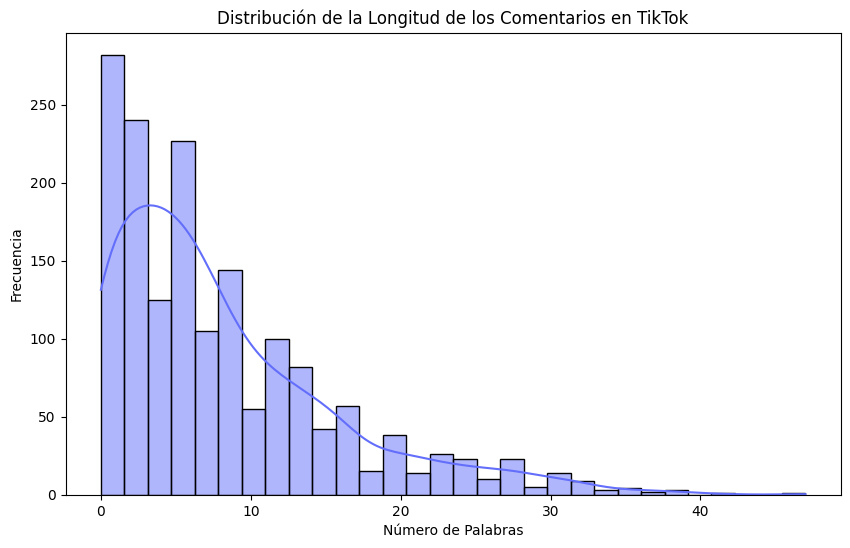

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df_tik_tok_clean['comment_length'], bins=30, kde=True, color='#636EFA')
plt.title('Distribución de la Longitud de los Comentarios en TikTok')
plt.xlabel('Número de Palabras')
plt.ylabel('Frecuencia')
plt.show()

In [18]:
from collections import Counter
import plotly.express as px

# Lista de palabras clave relacionadas con las 9Ps
keywords_9ps = ['producto', 'precio', 'plaza', 'publicidad', 'posconsumo', 'propósito', 
                'alianzas', 'personas', 'planeta', 'calidad', 'sostenible', 'responsable', 
                'ecológico', 'reciclaje', 'valor', 'distribución', 'comunicación']

# Contar la frecuencia de cada palabra clave
keyword_freq = Counter()
for comment in df_tik_tok_clean['comment_text']:
    words = comment.split()
    for word in words:
        if word in keywords_9ps:
            keyword_freq[word] += 1

# Crear un DataFrame con las palabras y sus frecuencias
df_keywords = pd.DataFrame(keyword_freq.most_common(), columns=['Palabra', 'Frecuencia'])

# Crear el gráfico de barras interactivo
fig = px.bar(df_keywords, x='Palabra', y='Frecuencia', 
             title='Frecuencia de Palabras Clave Relacionadas con las 9Ps',
             labels={'Palabra': 'Palabras Clave', 'Frecuencia': 'Frecuencia'}, 
             color='Frecuencia', color_continuous_scale='Blues')
fig.update_layout(xaxis_title='Palabras Clave', yaxis_title='Frecuencia')
fig.show()

In [19]:
# Convertir la columna 'comment_date' a formato de fecha
df_tik_tok_clean['comment_date'] = pd.to_datetime(df_tik_tok_clean['comment_date'], unit='s')

# Agrupar los comentarios por día
comments_per_day = df_tik_tok_clean.resample('D', on='comment_date').size().reset_index(name='count')

# Crear el gráfico de líneas interactivo
fig = px.line(comments_per_day, x='comment_date', y='count', 
              title='Evolución Temporal de los Comentarios en TikTok',
              labels={'comment_date': 'Fecha', 'count': 'Número de Comentarios'})
fig.update_traces(line_color='#636EFA')
fig.update_layout(xaxis_title='Fecha', yaxis_title='Número de Comentarios')
fig.show()

/var/folders/ys/2psfql1156jf72wjlnnt4vvc0000gn/T/ipykernel_35329/979578283.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
from collections import Counter
import pandas as pd

# Suponiendo que tienes un DataFrame 'df_tik_tok_clean' con una columna 'text_processed'
all_words = ' '.join(df_tik_tok_clean['comment_text']).split()
word_freq = Counter(all_words)

# Muestra las 50 palabras más comunes
print("Las 50 palabras más comunes:", word_freq.most_common(50))

Las 50 palabras más comunes: [('de', 442), ('que', 411), ('no', 369), ('y', 367), ('el', 308), ('a', 284), ('la', 270), ('en', 254), ('es', 230), ('me', 214), ('lo', 187), ('si', 160), ('starbucks', 143), ('los', 137), ('yo', 136), ('por', 134), ('con', 133), ('se', 125), ('un', 103), ('pero', 99), ('ya', 92), ('mi', 91), ('para', 86), ('te', 82), ('las', 78), ('como', 59), ('café', 58), ('solo', 57), ('una', 53), ('le', 53), ('más', 52), ('está', 51), ('o', 46), ('sabe', 46), ('del', 45), ('hay', 43), ('también', 43), ('sin', 43), ('muy', 41), ('bebida', 36), ('esta', 35), ('mejor', 35), ('al', 35), ('qué', 35), ('tiene', 35), ('bebidas', 34), ('caramel', 33), ('leche', 33), ('porque', 32), ('siempre', 32)]


In [21]:
'''
from transformers import pipeline

# Carga un modelo preentrenado para análisis de sentimiento
sentiment_pipeline = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# Función para analizar el sentimiento
def get_sentiment(text):
    result = sentiment_pipeline(text)[0]
    return result['label']  # Devuelve algo como '1 estrella' (negativo) o '5 estrellas' (positivo)

# Aplica a tus comentarios
df_tik_tok_clean['sentiment'] = df_tik_tok_clean['comment_text'].apply(lambda x: get_sentiment(x))

# Muestra cuántos comentarios son positivos, negativos, etc.
print(df_tik_tok_clean['sentiment'].value_counts())
'''

"\nfrom transformers import pipeline\n\n# Carga un modelo preentrenado para análisis de sentimiento\nsentiment_pipeline = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')\n\n# Función para analizar el sentimiento\ndef get_sentiment(text):\n    result = sentiment_pipeline(text)[0]\n    return result['label']  # Devuelve algo como '1 estrella' (negativo) o '5 estrellas' (positivo)\n\n# Aplica a tus comentarios\ndf_tik_tok_clean['sentiment'] = df_tik_tok_clean['comment_text'].apply(lambda x: get_sentiment(x))\n\n# Muestra cuántos comentarios son positivos, negativos, etc.\nprint(df_tik_tok_clean['sentiment'].value_counts())\n"

# Clasificar datos
## Análisis de Sentimiento de Comentarios de TikTok

En este apartado del notebook, se llevó a cabo un análisis de sentimiento de los comentarios recolectados de TikTok utilizando la biblioteca `pysentimiento`, una herramienta especializada para el análisis de texto en español. A continuación, se describen detalladamente los pasos realizados para procesar los datos, clasificar los sentimientos y visualizar los resultados:


In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [22]:
from pysentimiento import create_analyzer

# Crear analizador de sentimiento para español
analyzer = create_analyzer(task="sentiment", lang="es")

ModuleNotFoundError: No module named 'pysentimiento'

Esta celda crea objeto llamado analyzer que será el encargado de clasificar los sentimientos en los comentarios:

- create_analyzer es una función de pysentimiento que inicializa un modelo preentrenado.
- task="sentiment" indica que el objetivo es analizar sentimientos.
- lang="es" especifica que el análisis se hará en español.

*Resultado*: El modelo puede clasificar un texto en tres categorías: Positivo (POS), Negativo (NEG) o Neutral (NEU). Este analizador es la herramienta principal que usaremos en la siguiente celda.

In [ ]:
# Función para obtener el sentimiento
def get_sentiment(text):
    result = analyzer.predict(text)
    return result.output  # Devuelve 'POS', 'NEG' o 'NEU'

# Aplicar la función a la columna de comentarios
df_tik_tok_clean['sentiment'] = df_tik_tok_clean['comment_text'].apply(get_sentiment)

Aquí se define una función para analizar el sentimiento de un texto y luego se aplica a todos los comentarios del dataframe.:

get_sentiment:
- Toma un texto como entrada (un comentario).
- Usa analyzer.predict(text) para analizar el sentimiento.
- Devuelve la clasificación (POS, NEG o NEU) con result.output.


In [ ]:
# Contar la frecuencia de cada sentimiento
sentiment_counts = df_tik_tok_clean['sentiment'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribución de Sentimientos en los Comentarios de TikTok')
plt.xlabel('Sentimiento')
plt.ylabel('Número de Comentarios')
plt.show()

## Paso 6: Análisis Exploratorio Avanzado de Sentimientos 

1. Distribución de sentimientos por longitud de comentarios
Pregunta clave: ¿Los comentarios más largos tienden a ser más positivos, negativos o neutrales?

In [ ]:
# Convertir 'comment_date' a datetime (ajusta 'unit' si es necesario)
df_tik_tok_clean['comment_date'] = pd.to_datetime(df_tik_tok_clean['comment_date'], unit='s')

# Agrupar por fecha y sentimiento, contando el número de comentarios
sentiment_over_time = df_tik_tok_clean.groupby([df_tik_tok_clean['comment_date'].dt.date, 'sentiment']).size().reset_index(name='count')

# Crear el gráfico de líneas interactivo
fig = px.line(sentiment_over_time, x='comment_date', y='count', color='sentiment',
              title='Evolución Temporal de los Sentimientos en Comentarios de TikTok',
              labels={'comment_date': 'Fecha', 'count': 'Número de Comentarios', 'sentiment': 'Sentimiento'},
              color_discrete_map={'POS': 'green', 'NEG': 'red', 'NEU': 'blue'})

# Ajustar el diseño
fig.update_layout(xaxis_title='Fecha',
                  yaxis_title='Número de Comentarios',
                  legend_title='Sentimiento',
                  hovermode='x unified')

# Mostrar el gráfico
fig.show()

2. Palabras clave en comentarios positivos y negativos
Pregunta clave: ¿Qué palabras o temas predominan en los comentarios positivos y negativos?

In [ ]:
from collections import Counter

# Función para obtener las palabras más comunes por sentimiento
def get_top_words(sentiment, n=10):
    comments = df_tik_tok_clean[df_tik_tok_clean['sentiment'] == sentiment]['comment_text']
    all_words = ' '.join(comments).split()
    word_freq = Counter(all_words)
    return word_freq.most_common(n)

# Obtener palabras más frecuentes
top_positive = get_top_words('POS')
top_negative = get_top_words('NEG')

# Mostrar resultados
print("Palabras más comunes en comentarios positivos:", top_positive)
print("Palabras más comunes en comentarios negativos:", top_negative)

3. Evolución temporal de los sentimientos
Pregunta clave: ¿Cómo han cambiado los sentimientos a lo largo del tiempo?

In [ ]:
# Convertir la columna de fechas a formato datetime
df_tik_tok_clean['comment_date'] = pd.to_datetime(df_tik_tok_clean['comment_date'], unit='s')

# Agrupar por día y sentimiento
sentiment_over_time = df_tik_tok_clean.groupby([df_tik_tok_clean['comment_date'].dt.date, 'sentiment']).size().unstack(fill_value=0)

# Crear gráfico de líneas
plt.figure(figsize=(12, 6))
sentiment_over_time.plot(kind='line')
plt.title('Evolución Temporal de los Sentimientos en Comentarios de TikTok')
plt.xlabel('Fecha')
plt.ylabel('Número de Comentarios')
plt.show()

4. Análisis de comentarios neutrales
Pregunta clave: ¿Qué dicen los comentarios neutrales? ¿Hay sugerencias o temas recurrentes?

In [ ]:
from collections import Counter

# Filtrar comentarios neutrales
neutral_comments = df_tik_tok_clean[df_tik_tok_clean['sentiment'] == 'NEU']['comment_text']

# Contar palabras más comunes
all_neutral_words = ' '.join(neutral_comments).split()
neutral_word_freq = Counter(all_neutral_words)
print("Palabras más comunes en comentarios neutrales:", neutral_word_freq.most_common(10))